In [1]:
import numpy as np
import matplotlib.pyplot as plt

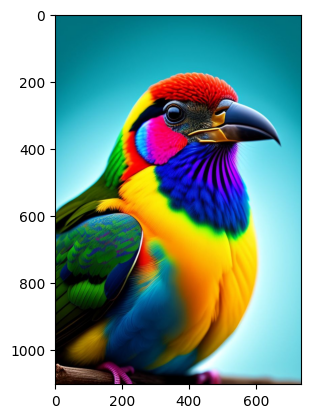

In [5]:
org_img = plt.imread('bird.jpg')
plt.imshow(org_img)

In [6]:
print("Shape of org_img is: ", org_img.shape)

Shape of org_img is:  (1104, 736, 3)


In [7]:
org_img = org_img/255
x_img = np.reshape(org_img, (org_img.shape[0]*org_img.shape[1], 3))

In [8]:
def find_closest_centroids(X, centroids):
    k = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(k):
            norm_ij = np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)
    return idx

In [9]:
def compute_centroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    for i in range (K):
        points = X[idx==i]
        centroids[i] = np.mean(points, axis = 0)

    return centroids

In [10]:
def kMeans_init_centroids(X,K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [11]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [23]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(x_img, K)
centroids, idx = run_kMeans(x_img, initial_centroids, max_iters)

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


In [24]:
x_recovered = centroids[idx,:]
x_recovered = np.reshape(x_recovered, org_img.shape)

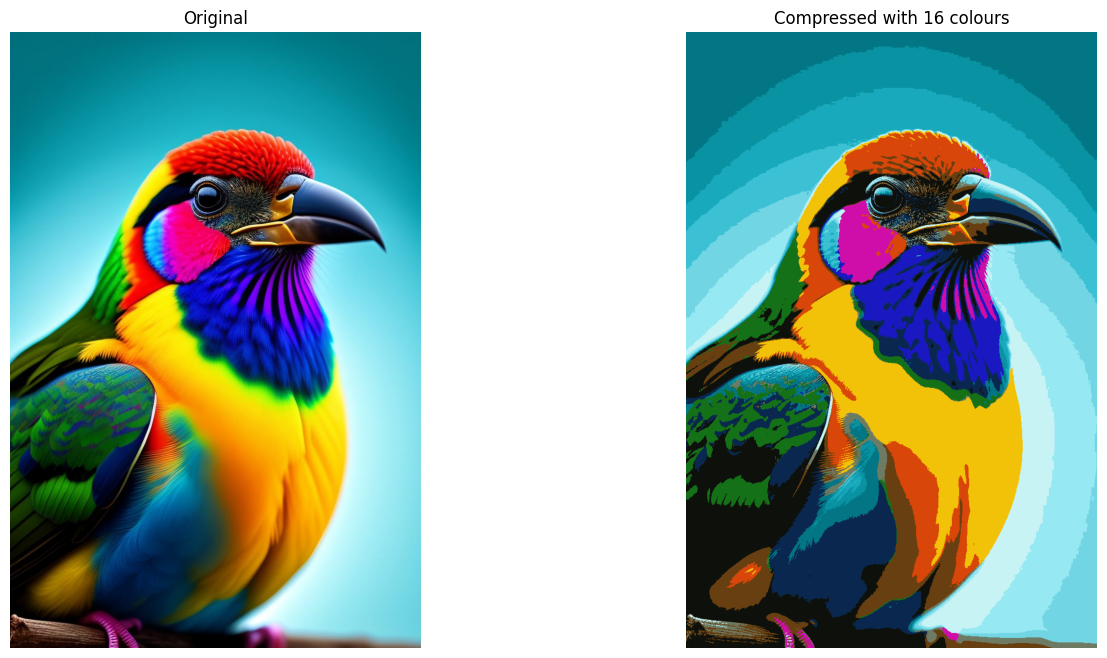

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Display the original image
ax[0].imshow(org_img)
ax[0].set_title('Original')
ax[0].axis('off')  

# Display the compressed image
ax[1].imshow(x_recovered)
ax[1].set_title('Compressed with %d colours' % K)
ax[1].axis('off')  

plt.show()